In [5]:
!pip install statsmodels==0.10.2
!pip install pandas==1.3.5
!pip install matplotlib==3.2.2
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
df_t = pd.read_csv("./dataset.csv")
# drop when moving between same points
df_t = df_t[df_t.going_from != df_t.going_to]
df_g = df_t
df_g = df_g[df_g.going_to != " LB "] # drop goint_to fix base because is a free-standing location
df_t["groups"] = df_t.going_from + df_t.going_to + df_t.robot

In [8]:
def beautify(df_t):
  df_t.real = ["sim" if val == 0 else "real" for val in df_t.real]
  df_t.tabledist = ["3 cm" if val == 3 else "15 cm" for val in df_t.tabledist]
  df_t["target dist."] = df_t.tabledist
  df_t["contextless"] = df_t["type (contextless)"]
  return df_t[["real", "target dist.", "contextless", "group","intercept"]]

In [9]:
def mod(df):
  df.robot = ["simulation" if x == 0 else "real" for x in df.robot]
  df["target dist."] = [f"{x} cm" for x in df["target dist."]]
  return df

+++++++++++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++ TIME ++++++++++++++++++++++++
+++++++++++++++++++++++++++++++++++++++++++++++++++++


,robot,target dist.,contextless,CI
0,simulation,3 cm,20.915871,20.16 -- 21.67
1,simulation,15 cm,6.681645,5.41 -- 7.95
2,real,3 cm,33.817821,32.88 -- 34.75
3,real,15 cm,12.518504,11.63 -- 13.41


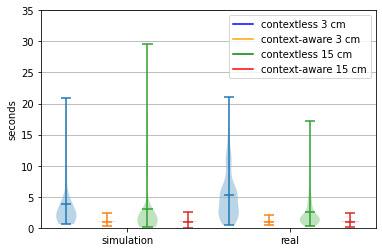

In [12]:
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++")
print("+++++++++++++++++++++++ TIME ++++++++++++++++++++++++")
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++")
time_results = []
for real in [0,1]:
  for tabledist in [3,15]:
      subset = df_t[(df_t.real == real) & (df_t.tabledist == tabledist) ]
      model = smf.mixedlm("time ~ type", subset, groups=subset["groups"])
      result = model.fit()
      time_results.append([real,tabledist] + [result.params[1]] + [" -- ".join([f"{x:.2f}" for x in result.conf_int(alpha=0.5).values[1,:]])])

time_results = mod(pd.DataFrame( time_results, columns = ["robot", "target dist.", "contextless", "CI",]))
time_results.to_csv("restable_time.csv", index = False, float_format="%.2f")


fig, axes = plt.subplots()

# contextless 3 cm (real & sim)
axes.violinplot(dataset = [df_g[(df_g['real'] == 0) & (df_g['type'] == 'contextless') & (df_g['tabledist'] == 3)]["scaled_time"].values, 
                           df_g[(df_g['real'] == 1) & (df_g['type'] == 'contextless') & (df_g['tabledist'] == 3)]["scaled_time"].values], showextrema=True, showmeans=True, positions=[1,5])
# context-awaret-aware 3 cm (real & sim)
axes.violinplot(dataset = [df_g[(df_g['real'] == 0) & (df_g['type'] == 'context-aware') & (df_g['tabledist'] == 3)]["scaled_time"].values,
                           df_g[(df_g['real'] == 1) & (df_g['type'] == 'context-aware') & (df_g['tabledist'] == 3)]["scaled_time"].values], showextrema=True, showmeans=True,  positions=[2,6])
# contextless 15 cm (real & sim)
axes.violinplot(dataset = [df_g[(df_g['real'] == 0) & (df_g['type'] == 'contextless') & (df_g['tabledist'] == 15)]["scaled_time"].values,
                           df_g[(df_g['real'] == 1) & (df_g['type'] == 'contextless') & (df_g['tabledist'] == 15)]["scaled_time"].values], showextrema=True, showmeans=True, positions=[3,7])
# context-aware 15 cm (real & sim)
axes.violinplot(dataset = [df_g[(df_g['real'] == 0) & (df_g['type'] == 'context-aware') & (df_g['tabledist'] == 15)]["scaled_time"].values,
                           df_g[(df_g['real'] == 1) & (df_g['type'] == 'context-aware') & (df_g['tabledist'] == 15)]["scaled_time"].values], showextrema=True, showmeans=True,  positions=[4,8])
axes.yaxis.grid(True)
axes.set_ylabel('seconds')
plt.xticks([2.5,6.5], ["simulation", "real"])
plt.plot([], c='blue', label='contextless 3 cm')
plt.plot([], c='orange', label='context-aware 3 cm')
plt.plot([], c='green', label='contextless 15 cm')
plt.plot([], c='red', label='context-aware 15 cm')
#plt.legend(loc='best', fancybox=True, framealpha=0.4)
plt.legend(loc='best', fancybox=True)
plt.ylim([0,35])

time_results


In [ ]:
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print("+++++++++++++++++++++++ DISTANCE +++++++++++++++++++++++")
print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
distance_results = []
for real in [0,1]:
  for tabledist in [3,15]:
      subset = df_t[(df_t.real == real) & (df_t.tabledist == tabledist) ]
      model = smf.mixedlm("distance ~ type", subset, groups=subset["groups"])
      result = model.fit()
      distance_results.append([real,tabledist] + [result.params[1]*100] + [" -- ".join([f"{x*100:.2f}" for x in result.conf_int(alpha=0.5).values[1,:]])])

distance_results = mod(pd.DataFrame( distance_results, columns = ["robot", "target dist.", "contextless (cm)", "CI (cm)",]))

distance_results.to_csv("restable_dist.csv", index = False, float_format="%.3f")

distance_results

fig, axes = plt.subplots()
# contextless 3 cm (real & sim)
axes.violinplot(dataset = [df_g[(df_g['real'] == 0) & (df_g['type'] == 'contextless') & (df_g['tabledist'] == 3)]["distance"].values, 
                           df_g[(df_g['real'] == 1) & (df_g['type'] == 'contextless') & (df_g['tabledist'] == 3)]["distance"].values], showextrema=True, showmeans=True, positions=[1,5])
# context-aware 3 cm (real & sim)
axes.violinplot(dataset = [df_g[(df_g['real'] == 0) & (df_g['type'] == 'context-aware') & (df_g['tabledist'] == 3)]["distance"].values,
                           df_g[(df_g['real'] == 1) & (df_g['type'] == 'context-aware') & (df_g['tabledist'] == 3)]["distance"].values], showextrema=True, showmeans=True,  positions=[2,6])
# contextless 15 cm (real & sim)
axes.violinplot(dataset = [df_g[(df_g['real'] == 0) & (df_g['type'] == 'contextless') & (df_g['tabledist'] == 15)]["distance"].values,
                           df_g[(df_g['real'] == 1) & (df_g['type'] == 'contextless') & (df_g['tabledist'] == 15)]["distance"].values], showextrema=True, showmeans=True, positions=[3,7])
# context-aware 15 cm (real & sim)
axes.violinplot(dataset = [df_g[(df_g['real'] == 0) & (df_g['type'] == 'context-aware') & (df_g['tabledist'] == 15)]["distance"].values,
                           df_g[(df_g['real'] == 1) & (df_g['type'] == 'context-aware') & (df_g['tabledist'] == 15)]["distance"].values], showextrema=True, showmeans=True,  positions=[4,8])

axes.yaxis.grid(True)
axes.set_ylabel('meters')
plt.xticks([2.5,6.5], ["simulation", "real"])
plt.plot([], c='blue', label='contextless 3 cm')
plt.plot([], c='orange', label='context-aware 3 cm')
plt.plot([], c='green', label='contextless 15 cm')
plt.plot([], c='red', label='context-aware 15 cm')
#plt.legend(loc='upper left', fancybox=True, framealpha=0.4)
plt.legend(loc='upper left', fancybox=True)


distance_results

In [ ]:
print("++++++++++++++++++++++++++++++++++++++++++++++++++++")
print("+++++++++++++++++++ ORIENTATION ++++++++++++++++++++")
print("++++++++++++++++++++++++++++++++++++++++++++++++++++")

orientation_results = []
for real in [0,1]:
  for tabledist in [3,15]:
      subset = df_t[(df_t.real == real) & (df_t.tabledist == tabledist) ]
      model = smf.mixedlm("orientation ~ type", subset, groups=subset["groups"])
      result = model.fit()
      orientation_results.append([real,tabledist] + [result.params[1]] + [" -- ".join([f"{x:.2f}" for x in result.conf_int(alpha=0.5).values[1,:]])])

orientation_results = mod(pd.DataFrame( orientation_results, columns = ["robot", "target dist.", "contextless", "CI",]))
orientation_results.to_csv("restable_orientation.csv", index = False, float_format="%.2f")

fig, axes = plt.subplots()
# contextless 3 cm (real & sim)
axes.violinplot(dataset = [df_g[(df_g['real'] == 0) & (df_g['type'] == 'contextless') & (df_g['tabledist'] == 3)]["orientation"].values, 
                           df_g[(df_g['real'] == 1) & (df_g['type'] == 'contextless') & (df_g['tabledist'] == 3)]["orientation"].values], showextrema=True, showmeans=True, positions=[1,5])
# context-aware 3 cm (real & sim)
axes.violinplot(dataset = [df_g[(df_g['real'] == 0) & (df_g['type'] == 'context-aware') & (df_g['tabledist'] == 3)]["orientation"].values,
                           df_g[(df_g['real'] == 1) & (df_g['type'] == 'context-aware') & (df_g['tabledist'] == 3)]["orientation"].values], showextrema=True, showmeans=True,  positions=[2,6])
# contextless 15 cm (real & sim)
axes.violinplot(dataset = [df_g[(df_g['real'] == 0) & (df_g['type'] == 'contextless') & (df_g['tabledist'] == 15)]["orientation"].values,
                           df_g[(df_g['real'] == 1) & (df_g['type'] == 'contextless') & (df_g['tabledist'] == 15)]["orientation"].values], showextrema=True, showmeans=True, positions=[3,7])
# context-aware 15 cm (real & sim)
axes.violinplot(dataset = [df_g[(df_g['real'] == 0) & (df_g['type'] == 'context-aware') & (df_g['tabledist'] == 15)]["orientation"].values,
                           df_g[(df_g['real'] == 1) & (df_g['type'] == 'context-aware') & (df_g['tabledist'] == 15)]["orientation"].values], showextrema=True, showmeans=True,  positions=[4,8])

axes.yaxis.grid(True)
axes.set_ylabel('degrees')
plt.xticks([2.5,6.5], ["simulation", "real"])
plt.plot([], c='blue', label='contextless 3 cm')
plt.plot([], c='orange', label='context-aware 3 cm')
plt.plot([], c='green', label='contextless 15 cm')
plt.plot([], c='red', label='context-aware 15 cm')
#plt.legend(loc='best', fancybox=True, framealpha=0.4)
plt.legend(loc='upper left', fancybox=True)
plt.ylim([0,75])

orientation_results